In [1]:
pip install category_encoders


  Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade scikit-learn


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ACER\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.




     ---------------------------------------- 11.0/11.0 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [12]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import category_encoders as ce

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# import xgboost     # extreme gradient boosting

# To visualize the 100 many the columns in data
pd.options.display.max_columns=100

In [15]:
data1 = pd.read_csv('training_set_features.csv')
data1.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [16]:
# Reading in the target data
data2 = pd.read_csv('training_set_labels.csv')
data2.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [17]:
# Exploring the percentage breakdown of the two classes in one possible target (seasonal flu rate)
data2['seasonal_vaccine'].value_counts(normalize=True) 

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [18]:
# Exploring the percentage breakdown of the two classes in one possible target (H1N1 flu rate)
data2['xyz_vaccine'].value_counts(normalize=True)   # class imbalance problem

0    0.787546
1    0.212454
Name: xyz_vaccine, dtype: float64

In [19]:
# Merging feature and target data
df = data1.merge(data2, how='left', on='respondent_id')
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [20]:
# Getting info about null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [21]:
# Getting number of null values
df.isna().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [22]:
# Explore numerical columns
df.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,xyz_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [23]:
# Explore object columns
df[[c for c in df.columns if df[c].dtype =='object']].describe()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [24]:
# Making a copy of main dataframe to use for visualizations
df2 = df.copy()

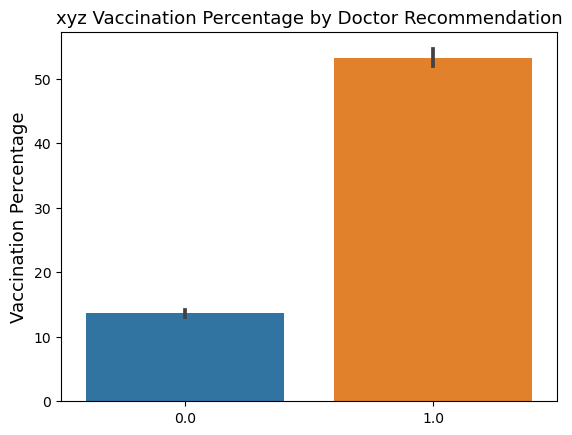

In [25]:
# Graph for relationship between xyz vaccination and Doctor recommendation
dr = sns.barplot(x=df2['doctor_recc_xyz'].dropna(), y=df2['xyz_vaccine']*100)
dr.set_xlabel('')
dr.set_ylabel('Vaccination Percentage', fontsize=13)
dr.set_title('xyz Vaccination Percentage by Doctor Recommendation', fontsize=13);

In [26]:
# Creating dictionary for mapping in order to create better names for x axis in graphs below
ins_dict = {1: 'Health Insurance',
           0: 'No Health Insurance'}

In [27]:
# Creating the column that will be used to create clear x axis tick marks in graph below
df2['health_ins_words'] = df2['health_insurance'].replace(ins_dict)

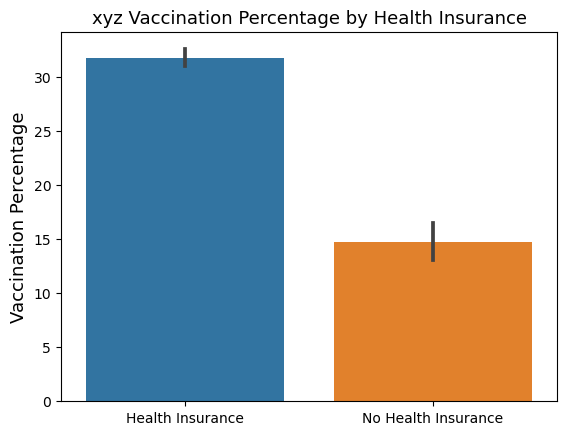

In [28]:
# Health Insurance graph
ins = sns.barplot(x=df2['health_ins_words'], y=df2['xyz_vaccine']*100)
ins.set_xlabel('')
ins.set_ylabel('Vaccination Percentage', fontsize=13)
ins.set_title('xyz Vaccination Percentage by Health Insurance', fontsize=13);

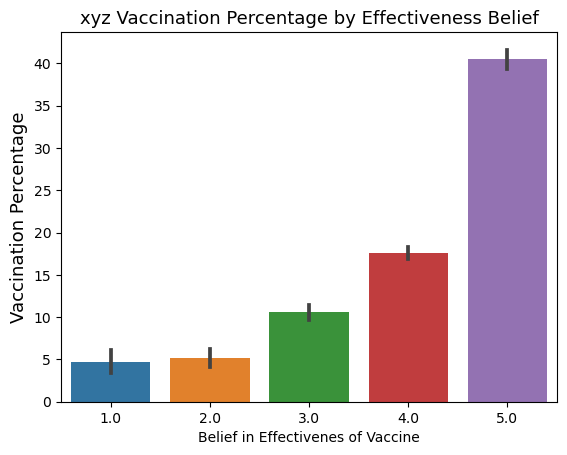

In [29]:
# Graph for vaccine percentage differrentiation depending on opinion of effectiveness of H1N1 Vaccine
ins = sns.barplot(x=df2['opinion_xyz_vacc_effective'].dropna(), y=df2['xyz_vaccine']*100)
ins.set_xlabel('Belief in Effectivenes of Vaccine')
ins.set_ylabel('Vaccination Percentage', fontsize=13)
ins.set_title('xyz Vaccination Percentage by Effectiveness Belief', fontsize=13);

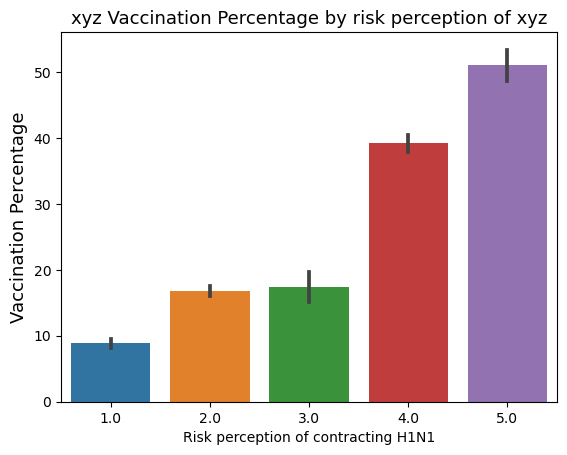

In [30]:
# Risk graph exploring vaccine percentage depending on risk perception of H1N1
ins = sns.barplot(x=df2['opinion_xyz_risk'].dropna(), y=df2['xyz_vaccine']*100)
ins.set_xlabel('Risk perception of contracting H1N1')
ins.set_ylabel('Vaccination Percentage', fontsize=13)
ins.set_title('xyz Vaccination Percentage by risk perception of xyz', fontsize=13);

In [31]:
# Define our X and y
X = df.drop(columns = ['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'], axis=1)
y = df['xyz_vaccine']

In [32]:
from sklearn.model_selection import train_test_split
# Train - Holdout Set Split
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [33]:
# Regular Train Test Split
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [34]:
# Set up lists for each columns datatypes
num_cols = []
ohe_cols = []
freq_cols = []

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [35]:
# We wanted to see each column category
print(f'Numerical Columns:', num_cols)
print('\n')
print(f'Object Columns (with less than 10 unique values):', ohe_cols)
print('\n')
print(f'Object Columns (with more than 10 unique values):', freq_cols)

Numerical Columns: ['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


Object Columns (with less than 10 unique values): ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']


Object Columns (with more than 10 unique values): ['hhs_geo_region', 'employment_industry', 'employment_occupation']


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import category_encoders as ce

# Preprocessing with Pipelines
num_transformer = Pipeline(steps=[
    ('num_imputer', IterativeImputer(max_iter=100, random_state=42)),  # Replace missing values by IterativeImputer
    ('minmaxscaler', MinMaxScaler())                                   # Scale the numbers by MinMaxScaler
])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Replace missing categories by SimpleImputer
    ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))                    # Transform each category into a new column
])

freq_transformer = Pipeline(steps=[
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values before CountEncoder
    ('freq_encoder', ce.CountEncoder(normalize=True, min_group_size=.05)),       # Replace category names with frequency counts by CountEncoder
    ('freq_imputer2', IterativeImputer(max_iter=100, random_state=42))           # Replace missing values after CountEncoder if any
])


In [37]:
# Preprocessor defined using ColumnTransformer by packaging the all components together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

In [38]:
preprocessor.fit(X_tr)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['xyz_concern', 'xyz_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_t...
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer2',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [39]:
# Let'see what this looks like after the preprocessor transformation
X_tr_transformed = preprocessor.transform(X_tr)
X_tr_transformed.shape

(19228, 59)

In [40]:

# Visualize it with Pandas dataframe 
pd.DataFrame(X_tr_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1.000000,0.5,0.016076,0.963804,0.038064,0.894508,0.0,1.000000,0.0,0.116478,0.141558,1.0,0.0,1.000000,0.779010,0.75,0.296807,0.75,0.75,0.279800,0.75,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.106407,0.499168,0.504213
1,0.666667,1.0,0.016076,0.000000,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,0.0,0.110629,0.920662,0.75,0.765602,0.25,0.75,0.759933,0.25,0.333333,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.160235,0.340961,0.371854
2,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,0.0,1.000000,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.00,1.00,0.279800,0.00,0.333333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076659,0.499168,0.504213
3,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.25,0.75,0.279800,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.499168,0.504213
4,0.333333,1.0,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,1.0,1.000000,0.920662,0.25,0.062409,0.00,0.75,0.279800,0.25,0.666667,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.340961,0.371854


In [41]:
# Setting up the logistic regression model to go through the pipeline
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, C=1, class_weight= 'balanced', solver= 'lbfgs',           
                                      random_state=42))
])


In [42]:
# Fitting the logistic regression model on the training data
logreg.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['xyz_concern',
                                                   'xyz_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavi...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer2',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=500,
                                    random_state=42))])

In [47]:
def evaluate(estimator, X_tr, X_te, y_tr, y_te, roc_auc='skip'):
    
    # Grab predictions
    tr_preds = estimator.predict(X_tr)
    te_preds = estimator.predict(X_te)
    
    # output needed for roc_auc_score
    if roc_auc == 'skip': # skips calculating the roc_auc_score
        train_out = False
        test_out = False
    elif roc_auc == 'dec': 
        train_out = estimator.decision_function(X_tr)
        test_out = estimator.decision_function(X_te)
    elif roc_auc == 'proba': 
        train_out = estimator.predict_proba(X_tr)[:, 1] # proba for the 1 class
        test_out = estimator.predict_proba(X_te)[:, 1]
    else:
        raise Exception("The value for roc_auc should be 'skip', 'dec' or 'proba'")    
    
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train Precision: {precision_score(y_tr, tr_preds)}")
    print(f"Train Recall: {recall_score(y_tr, tr_preds)}")
    print(f"Train F1-Score: {f1_score(y_tr, tr_preds)}")
    if type(train_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_train, train_out)}")
        
    print("*" * 10)
    print("Testing Scores:")
    print(f"Test Accuracy: {accuracy_score(y_te, te_preds)}")
    print(f"Test Precision: {precision_score(y_te, te_preds)}")
    print(f"Test Recall: {recall_score(y_te, te_preds)}")
    print(f"Test F1-Score: {f1_score(y_te, te_preds)}")
    if type(test_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")    


In [48]:
# Evaluating the logistic regression for various metrics
evaluate(logreg, X_tr, X_te, y_tr, y_te)

Training Scores:
Train Accuracy: 0.775691699604743
Train Precision: 0.48177166613367445
Train Recall: 0.7375764993880048
Train F1-Score: 0.5828416674726763
**********
Testing Scores:
Test Accuracy: 0.7793261231281198
Test Precision: 0.48755583918315254
Test Recall: 0.7475538160469667
Test F1-Score: 0.590189262263422


In [50]:
output_final_model = logreg.fit(X_tr, y_tr)

In [62]:
hold_preds_final_model = logreg.predict(X_hold)
cm=confusion_matrix(y_hold, hold_preds_final_model, normalize='true')

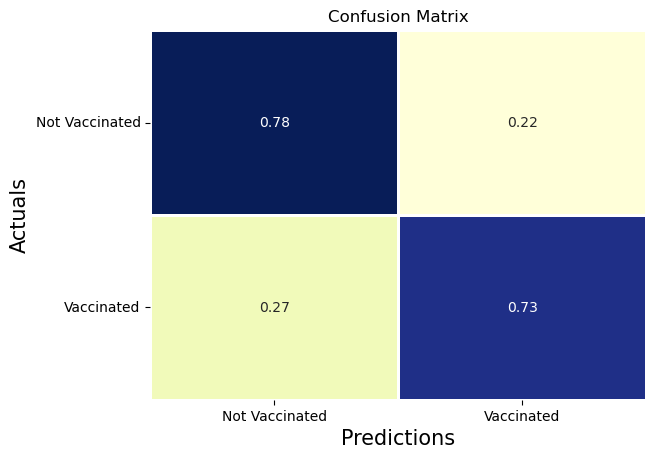

In [63]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cbar=False, linewidths=1, cmap="YlGnBu");  

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predictions', fontsize = 15)
ax.set_ylabel('Actuals', fontsize = 15)
ax.xaxis.set_ticklabels(['Not Vaccinated', 'Vaccinated'])
ax.yaxis.set_ticklabels(['Not Vaccinated', 'Vaccinated'], rotation = 0, fontsize = 10);

In [64]:
logreg['preprocessor'].fit_transform(X_tr).shape

(19228, 59)

In [53]:
logreg['preprocessor'].fit_transform(X_tr).shape

(19228, 59)

In [54]:
pd.DataFrame(logreg['preprocessor'].fit_transform(X_tr)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1.000000,0.5,0.016076,0.963804,0.038064,0.894508,0.0,1.000000,0.0,0.116478,0.141558,1.0,0.0,1.000000,0.779010,0.75,0.296807,0.75,0.75,0.279800,0.75,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.106407,0.499168,0.504213
1,0.666667,1.0,0.016076,0.000000,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,0.0,0.110629,0.920662,0.75,0.765602,0.25,0.75,0.759933,0.25,0.333333,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.160235,0.340961,0.371854
2,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,0.0,1.000000,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.00,1.00,0.279800,0.00,0.333333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076659,0.499168,0.504213
3,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.25,0.75,0.279800,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.499168,0.504213
4,0.333333,1.0,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,1.0,1.000000,0.920662,0.25,0.062409,0.00,0.75,0.279800,0.25,0.666667,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.340961,0.371854


In [65]:
ohe_cols_transformed = logreg['preprocessor'].transformers_[1][1]['ohe_encoder']
ohe_cols_transformed

OneHotEncoder(handle_unknown='ignore')

In [67]:
final_cols = [num_cols, ohe_cols_transformed, freq_cols]
final_cols

[['xyz_concern',
  'xyz_knowledge',
  'behavioral_antiviral_meds',
  'behavioral_avoidance',
  'behavioral_face_mask',
  'behavioral_wash_hands',
  'behavioral_large_gatherings',
  'behavioral_outside_home',
  'behavioral_touch_face',
  'doctor_recc_xyz',
  'doctor_recc_seasonal',
  'chronic_med_condition',
  'child_under_6_months',
  'health_worker',
  'health_insurance',
  'opinion_xyz_vacc_effective',
  'opinion_xyz_risk',
  'opinion_xyz_sick_from_vacc',
  'opinion_seas_vacc_effective',
  'opinion_seas_risk',
  'opinion_seas_sick_from_vacc',
  'household_adults',
  'household_children'],
 OneHotEncoder(handle_unknown='ignore'),
 ['hhs_geo_region', 'employment_industry', 'employment_occupation']]